In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
sys.path.append('/content/drive/My Drive/ML_Library')

In [3]:
from algorithms.multi_classification import LogisticRegressionOvR

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
train_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/multi_classification_train.csv')
test_data = pd.read_csv('/content/drive/My Drive/ML_Library/datasets/multi_classification_test.csv')

In [10]:
# Extract features and target
X = train_data.iloc[:, 1:-1].values  # Features (exclude ID and Class)
y = train_data['Class'].values  # Target

# Normalize features
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split  # For data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
num_classes = len(np.unique(y))
model = LogisticRegressionOvR(num_classes, lr=0.01, epochs=100)

In [12]:
# Train the model
model.train(X_train, y_train)

Epoch 1/100, Cost: 3.4657
Epoch 11/100, Cost: 3.3504
Epoch 21/100, Cost: 3.2449
Epoch 31/100, Cost: 3.1481
Epoch 41/100, Cost: 3.0592
Epoch 51/100, Cost: 2.9772
Epoch 61/100, Cost: 2.9014
Epoch 71/100, Cost: 2.8312
Epoch 81/100, Cost: 2.7659
Epoch 91/100, Cost: 2.7051


In [13]:
# Evaluate the model
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [14]:
train_accuracy = np.mean(y_train_pred == y_train) * 100
test_accuracy = np.mean(y_test_pred == y_test) * 100

print(f"Training Accuracy: {train_accuracy:.2f}%")
print(f"Testing Accuracy: {test_accuracy:.2f}%")

Training Accuracy: 75.10%
Testing Accuracy: 75.90%


In [15]:
# Plot training and testing accuracy
plt.bar(['Train Accuracy', 'Test Accuracy'], [train_accuracy, test_accuracy], color=['blue', 'orange'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy (%)')
plt.show()

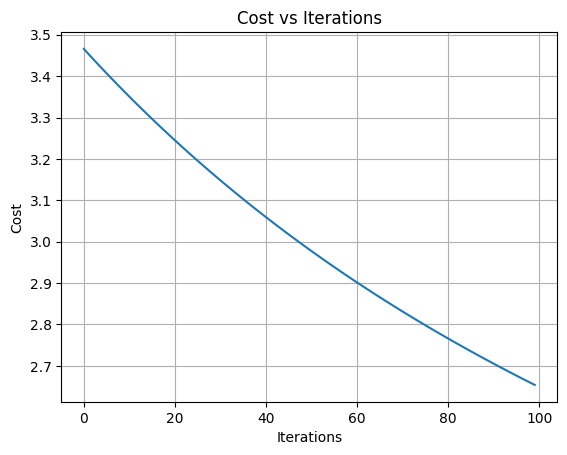

In [16]:
model.visualize_cost()

In [21]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_test_pred, average='macro')
print(f"F1 Score (Macro Average): {f1}")

F1 Score (Macro Average): 0.636371130278824


In [17]:
test_X = test_data.drop(columns=['ID']).values

In [18]:
test_y_pred = model.predict(test_X)

In [19]:
# Convert test_y_pred to a DataFrame
# Assuming test_y_pred is a NumPy array or list
predictions = pd.DataFrame(test_y_pred, columns=['predicted_label'])

# Save to a CSV file in Google Drive
file_path = '/content/drive/MyDrive/ML_Library/datasets/multi_class_test_pred.csv'
predictions.to_csv(file_path, index=False)

print(f"Predictions saved to: {file_path}")

Predictions saved to: /content/drive/MyDrive/ML_Library/datasets/multi_class_test_pred.csv
